Используемое устройство: cpu


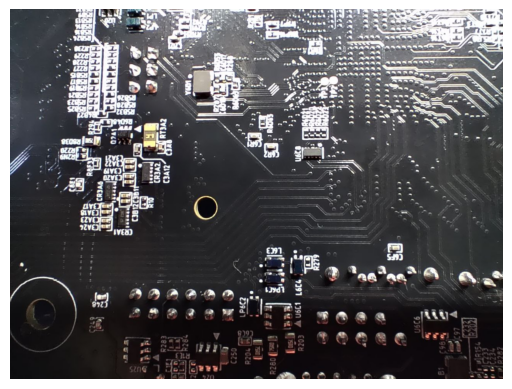

Предсказанный класс: hard disc


In [4]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18
from PIL import Image
import matplotlib.pyplot as plt
import requests

# Проверка наличия GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используемое устройство: {device}")

# Загрузка модели ResNet-18
model = resnet18(pretrained=True)
model = model.to(device)
model.eval()  # Устанавливаем режим оценки (inference)

# Трансформация изображения
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Загрузка классов ImageNet
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
response = requests.get(url)
if response.status_code == 200:
    classes = response.text.splitlines()
else:
    raise Exception(f"Не удалось загрузить классы: {response.status_code}")

def predict_image(image_path):
    # Загрузка изображения
    image = Image.open(image_path).convert('RGB')
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Подготовка изображения
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Предсказание
    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted_class = outputs.max(1)

    print(f"Предсказанный класс: {classes[predicted_class.item()].strip()}")

# Пример использования
image_path = "learn/images/a1.jpg"  # Укажите путь к вашему изображению
predict_image(image_path)
